In [1]:
import numpy as np
import pandas as pd


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dongxujia/nltk_data...


True

In [3]:
data=pd.read_csv('stockerbot.csv')

In [4]:
num_row_total = len(data)
num_row_total

28276

This code is inspired by https://inventwithpython.com/hacking/chapter12.html

In [6]:
UPPERLETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

LETTERS_AND_SPACE = UPPERLETTERS + UPPERLETTERS.lower() + ' \t\n'

def loadDictionary():
    dictionaryFile = open('dictionary.txt')
    englishWords = {}
    for word in dictionaryFile.read().split('\n'):
        englishWords[word] = None
    dictionaryFile.close()
    return englishWords

ENGLISH_WORDS = loadDictionary()

def getEnglishCount(message):
    message = str(message)
    if not message:
        return 0.0
    message = message.upper()
    message = removeNonLetters(message)
    possibleWords = message.split()
    if possibleWords == []:
        return 0.0 # no words at all, so return 0.0
    matches = 0
    for word in possibleWords:
        if word in ENGLISH_WORDS:
            matches += 1
    return float(matches) / len(possibleWords)

def removeNonLetters(message):
    message = str(message)
    lettersOnly = []
    for symbol in message:
        if symbol in LETTERS_AND_SPACE:
            lettersOnly.append(symbol)
    return ''.join(lettersOnly)

def isEnglish(message, wordPercentage=10, letterPercentage=50):
    message = str(message)
    wordsMatch = getEnglishCount(message) * 100 >= wordPercentage
    numLetters = len(removeNonLetters(message))
    messageLettersPercentage = float(numLetters) / len(message) * 100
    lettersMatch = messageLettersPercentage >= letterPercentage
    return wordsMatch and lettersMatch
 

In [7]:
cleaned_data = data[data["text"].apply(isEnglish, "text")]

In [8]:
num_row_cleaned = len(cleaned_data)
num_row_cleaned

26626

In [9]:
f=cleaned_data[cleaned_data['verified'] == "FALSE"]

In [41]:
f.values.tolist()

[[1.0197430633280307e+18,
  'RT @josheidelson: Exclusive: Elon Musk called Sierra Club\'s executive director Saturday and "asked for some help via Twitter" the green gr…',
  'Thu Jul 19 00:37:46 +0000 2018',
  'TheStalwart',
  'TWTR',
  'Twitter',
  'FALSE'],
 [1.016082850326643e+18,
  'The robot homie R2-D2 told me to buy sell and hold Fidelity National Information Services $FIS #BullMarket',
  'Sun Jul 08 22:13:24 +0000 2018',
  'StockTipRobot',
  'FIS',
  'Fidelity National Information Services',
  'FALSE'],
 [1.0160852976611203e+18,
  'Arthur J Gallagher &amp; Co $AJG vs. Marsh &amp; McLennan Companies $MMC Critical Contrast https://t.co/aETTR2nZEq',
  'Sun Jul 08 22:23:07 +0000 2018',
  'ConsumerFeed',
  'AJG',
  'Arthur J. Gallagher & Co.',
  'FALSE'],
 [1.0160862425833512e+18,
  'Arthur J Gallagher &amp; Co $AJG vs. Marsh &amp; McLennan Companies $MMC Critical Contrast https://t.co/CDjCvAKg5D',
  'Sun Jul 08 22:26:52 +0000 2018',
  'MareaInformativ',
  'AJG',
  'Arthur J. Gallag

In [11]:
num_row_false = len(f)
num_row_false

26259

In [12]:
t=cleaned_data[cleaned_data['verified'] == "TRUE"]


In [13]:
num_row_true = len(t)
num_row_true

355

In [14]:
f_samp = f.sample(355)

In [15]:
f_samp

,id,text,timestamp,source,symbols,company_names,verified
20462,1.019570e+18,Binance fees are 3-5x less than Bittrex ! 🙌 R...,Wed Jul 18 13:11:24 +0000 2018,RickyGr92298314,DG,Dollar General Corporation,FALSE
20857,1.019577e+18,$AAOI trusting our stop placed at 40.00 for no...,Wed Jul 18 13:39:49 +0000 2018,mairuzu3030,AAOI,Applied Optoelectronics,FALSE
13450,1.019189e+18,Critical Analysis: Sensient Technologies $SXT ...,Tue Jul 17 11:57:13 +0000 2018,ConsumerFeed,LYB,LyondellBasell Industries N.V.,FALSE
103,1.016202e+18,Zacks: Brokerages Anticipate Aon PLC $AON Will...,Mon Jul 09 06:07:05 +0000 2018,TheMarketsDaily,AON,Aon plc,FALSE
2748,1.017250e+18,Zacks: Brokerages Anticipate Federal Realty In...,Thu Jul 12 03:32:05 +0000 2018,ledgerzette,FRT,Federal Realty Investment Trust,FALSE
9881,1.018855e+18,Thermo Fisher Scientific $TMO PT Raised to $23...,Mon Jul 16 13:50:54 +0000 2018,dailypoliticaln,TMO,Thermo Fisher Scientific Inc.,FALSE
27972,1.019730e+18,Cisco +3.7% on report Amazon denies plans to c...,Wed Jul 18 23:26:48 +0000 2018,jjjinvesting,JNPR,Juniper Networks,FALSE
962,1.016650e+18,$JEC Jacobs - Jacobs Selected by Eastman for C...,Tue Jul 10 11:45:43 +0000 2018,Allstocknews,JEC,Jacobs Engineering Group Inc.,FALSE
22526,1.019613e+18,real question the must voteD will be i got an ...,Wed Jul 18 16:02:04 +0000 2018,cryptomocho,APD,Air Products and Chemicals,FALSE
8803,1.018644e+18,RT @eWhispers: #earnings for the week $NFLX $...,Sun Jul 15 23:49:09 +0000 2018,Wisskobe,CTAS,Cintas Corporation,FALSE


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [17]:
for sentence in t["text"]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Who says the American Dream is dead? https://t.co/CRgx19x7sA
compound: -0.5106, 
neg: 0.35, 
neu: 0.488, 
pos: 0.163, 
Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY
compound: 0.2014, 
neg: 0.0, 
neu: 0.918, 
pos: 0.082, 
How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ
compound: -0.6249, 
neg: 0.282, 
neu: 0.718, 
pos: 0.0, 
.@RealMoney's David Butler's favorite FANG stock isn't #RealMoneySOD Alphabet but Facebook https://t.co/MczAPSFjOi
compo

neu: 1.0, 
pos: 0.0, 
#PrimeDay just ended but Walmart's fight against its archrival hasn't. An exclusive pricing study  showed that Wal… https://t.co/4XLkgU7Mpp
compound: -0.6066, 
neg: 0.236, 
neu: 0.764, 
pos: 0.0, 
Wednesday's Stocks to Watch include $GOOGL $MS $TXN $UAL and more: https://t.co/PQUdnScSYX
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Wednesday's Stocks to Watch include $GOOGL $MS $TXN $UAL and more: https://t.co/LzlSLGqx9z via @WSJ
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Benzinga's Daily Biotech Pulse: Novartis Earnings J&amp;J's HIV Combo Clears FDA Hurdle Cara To Offer Shares… https://t.co/lJlvgToBhI
compound: 0.0772, 
neg: 0.0, 
neu: 0.925, 
pos: 0.075, 
I’ve had a little more time to process this change than those of you just finding out so I’ll have been through t… https://t.co/MpCBjYZcvz
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
One Insurer Just Gave A Glimpse Into How Autonomous Auto Insurance Will Work https://t.co/iqwTBBFYOy $F $GM $TSLA 

In [37]:
t

,id,text,timestamp,source,symbols,company_names,verified,compound
0,1.019697e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,TRUE,0.0000
1,1.019709e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,TRUE,0.0000
2,1.019711e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,TRUE,-0.5106
3,1.019717e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,TRUE,0.2014
4,1.019718e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,TRUE,-0.6249
5,1.019719e+18,.@RealMoney's David Butler's favorite FANG sto...,Wed Jul 18 23:04:00 +0000 2018,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,TRUE,0.2500
6,1.019720e+18,Don’t miss my convo with one of my favorite th...,Wed Jul 18 23:06:58 +0000 2018,ianbremmer,HRS,Harris,TRUE,0.4003
7,1.019721e+18,U.S. intelligence documents on Nelson Mandela ...,Wed Jul 18 23:08:45 +0000 2018,Reuters,INTC-USB,Intel*U.S.,TRUE,0.4767
8,1.019721e+18,Senate wants emergency alerts to go out throug...,Wed Jul 18 23:09:00 +0000 2018,TechCrunch,NFLX,Netflix,TRUE,-0.3818
9,1.019721e+18,Hedge fund manager Marc Larsy says bitcoin $40...,Wed Jul 18 23:10:41 +0000 2018,MarketWatch,BTC,Bitcoin,TRUE,0.0000


In [19]:
range(len(t))

range(0, 355)

In [20]:
t['text'].iloc[0]

'VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV'

In [21]:
def sentiment_analyzer(dataframe):
    sid = SentimentIntensityAnalyzer()
    dataframe.loc[0, 'compound'] = 0
    for i in range(len(dataframe)):
        ss = sid.polarity_scores(dataframe['text'].iloc[i])
        dataframe['compound'].iloc[i] = ss['compound']

In [22]:
sentiment_analyzer(t)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [23]:
t_mean = t.mean()["compound"]

In [34]:
import seaborn as sns

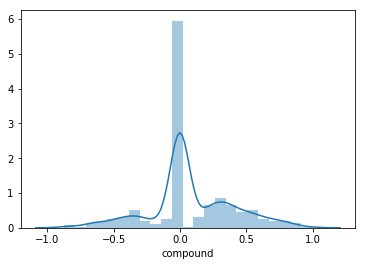

In [35]:
sns.distplot(t['compound'])

In [33]:
sentiment_analyzer(f_samp)

AttributeError: 'float' object has no attribute 'encode'

In [36]:
f_samp

,id,text,timestamp,source,symbols,company_names,verified,compound
20462,1.019570e+18,Binance fees are 3-5x less than Bittrex ! 🙌 R...,Wed Jul 18 13:11:24 +0000 2018,RickyGr92298314,DG,Dollar General Corporation,FALSE,0.6731
20857,1.019577e+18,$AAOI trusting our stop placed at 40.00 for no...,Wed Jul 18 13:39:49 +0000 2018,mairuzu3030,AAOI,Applied Optoelectronics,FALSE,0.4939
13450,1.019189e+18,Critical Analysis: Sensient Technologies $SXT ...,Tue Jul 17 11:57:13 +0000 2018,ConsumerFeed,LYB,LyondellBasell Industries N.V.,FALSE,-0.3182
103,1.016202e+18,Zacks: Brokerages Anticipate Aon PLC $AON Will...,Mon Jul 09 06:07:05 +0000 2018,TheMarketsDaily,AON,Aon plc,FALSE,0.0000
2748,1.017250e+18,Zacks: Brokerages Anticipate Federal Realty In...,Thu Jul 12 03:32:05 +0000 2018,ledgerzette,FRT,Federal Realty Investment Trust,FALSE,0.5106
9881,1.018855e+18,Thermo Fisher Scientific $TMO PT Raised to $23...,Mon Jul 16 13:50:54 +0000 2018,dailypoliticaln,TMO,Thermo Fisher Scientific Inc.,FALSE,0.0000
27972,1.019730e+18,Cisco +3.7% on report Amazon denies plans to c...,Wed Jul 18 23:26:48 +0000 2018,jjjinvesting,JNPR,Juniper Networks,FALSE,-0.2732
962,1.016650e+18,$JEC Jacobs - Jacobs Selected by Eastman for C...,Tue Jul 10 11:45:43 +0000 2018,Allstocknews,JEC,Jacobs Engineering Group Inc.,FALSE,0.0000
22526,1.019613e+18,real question the must voteD will be i got an ...,Wed Jul 18 16:02:04 +0000 2018,cryptomocho,APD,Air Products and Chemicals,FALSE,0.0000
8803,1.018644e+18,RT @eWhispers: #earnings for the week $NFLX $...,Sun Jul 15 23:49:09 +0000 2018,Wisskobe,CTAS,Cintas Corporation,FALSE,0.0000


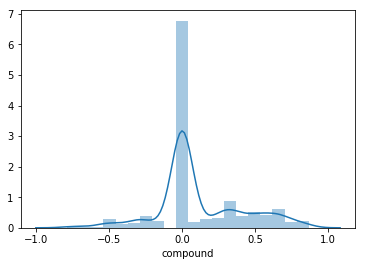

In [29]:
sns.distplot(f_samp['compound'])

In [30]:
f_samp_mean = f_samp.mean()["compound"]

In [31]:
observed_val = t_mean - f_samp_mean

In [32]:
observed_val

-0.02968554913752179

Null hypothesis: In the population, the distribution of compound values for the financial tweets is the same for verified users as for unverified users.

Alternative hypothesis: In the population, verified users' financial tweets have higher compound values than unverified users' financial tweets.

Test Statistic: The difference between the two group means: compound values of verified users' financial tweets minus those of unverified users' financial tweets.

In [55]:
new = pd.concat([t, f_samp])[['verified','compound']]

In [92]:
# calculate the observed test statistic:

new = pd.concat([t, f_samp])[['verified','compound']]

lst = np.zeros(5000)
new 
for i in range(5000):
# new['sampled']
    sampled = new.sample(len(new), replace = False)['verified']
    new['sampled'] = sampled.values
    grouped = new[['compound', 'sampled']].groupby("sampled").apply(np.average)
    lst[i] = grouped["TRUE"] - grouped["FALSE"]
# pd.new.drop("sampled")

lst


array([ 0.01236789, -0.00700901,  0.00399662, ..., -0.01508676,
        0.02794366, -0.02487549])

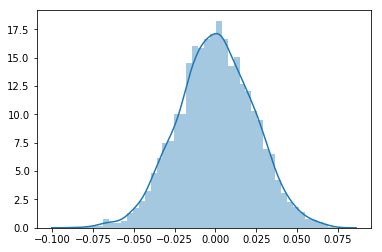

In [93]:
sns.distplot(lst)

In [65]:
# calculate the observed test statistic:

#     select the verified and compound values columns of two tables and combine two tables together

#     group by verified column, calculate the average of compound values for verified and unverified tweets respectively

#     return the average of verified tweets minus the average of unverified tweets

# define the simulated test statistic function:

#     sample the combined table without replacement and select the verified column

#     append the sampled verified column to the original combined table

#     drop the original verified column, group the remaining table by sampled verified column, calculate the average of compound values for verified and unverified tweets respectively
    
#     return the average of verified tweets minus the average of unverified tweets


# make an empty array to store simualted test statistics

# repetitions = 5000?

# repetitions = 5000
# for i in np.arange(repetitions):
    
#     calculate a simulated test statistic
    
#     append the new test statistic to the test statistics array

In [ ]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

In [ ]:
shuffled_only = original_and_shuffled.drop('Maternal Smoker')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

In [ ]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [ ]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)                               

In [94]:
sentiment_analyzer(f)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 